In [2]:
# Import necessary libraries for data manipulation, visualization, and machine learning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import joblib
import string
import math
import time

# Sklearn libraries for machine learning and text processing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold, cross_validate, validation_curve, learning_curve
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn import metrics


# NLTK libraries for text processing (lemmatization, stemming, stopwords, POS tagging)
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize

# Set up visualization
%matplotlib inline
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

# Download necessary NLTK resources for text processing
nltk.download('wordnet')  # WordNet for lemmatization
nltk.download('omw-1.4')  # Open Multilingual Wordnet
nltk.download('punkt')  # Tokenizer
nltk.download('punkt_tab')
nltk.download('stopwords')  # Stopwords for text cleaning
nltk.download('averaged_perceptron_tagger')  # POS tagger for part-of-speech tagging
nltk.download('averaged_perceptron_tagger_eng')  # Additional tagger
nltk.download('tagsets_json')  # Tagset resource

print("\n All libraries imported successfully!")

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...



 All libraries imported successfully!


[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package tagsets_json to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets_json.zip.


In [3]:
pd_train = pd.read_excel('/content/AI_vs_huam_train_dataset.xlsx')

In [4]:
pd_test = pd.read_csv('/content/Final_test_data.csv')

In [5]:
pd_train.head()

,essay,label
0,International sports events require the most w...,0
1,Globalisation has become a significant aspect ...,0
2,There is an ever-increasing number of bullying...,0
3,"It is commonly believed, that companies should...",0
4,Despite knowing about the adverse effects of c...,0


In [6]:
pd_train.describe()

,label
count,3728.000000
mean,0.500000
std,0.500067
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [7]:
pd_train['label'].value_counts()

,count
label,
0,1864
1,1864


In [8]:
pd_train['essay'].str.lower()
pd_test['essay'].str.lower()

,essay
0,"enjoyment means entertainment, satisfaction of..."
1,before to start with my opinion of the topic i...
2,"thats a really really good subject, but acctul..."
3,i disagree with the statement saying that it i...
4,it is undeniable that advertisements play a si...
...,...
864,advertisements occupy a big part in our lives ...
865,young people are the fundamental building bloc...
866,"in my opinion, and experience, old people can ..."
867,i agree with this statement that most advertis...


In [9]:
#The code below is my initial attempt at removing numbers in string elements
#pd_train['essay'] = pd_train['essay'].str.replace(r'\d+', '', regex=True)


#below is my second attempt after researching for a better method.
def remove_numbers_func(essay):
  if pd.isna(essay):
    return essay
  return re.sub(r'\d+', '', str(essay))

In [10]:
def remove_puncs_funcs(essay):
  if pd.isna(essay):
    return essay
  return re.sub(r'[^\w\s]', '', str(essay))

In [11]:
def remove_alpha_numeric_func(essay):
  if pd.isna(essay):
    return essay
  return re.sub(r'\w*\d\w*', '', essay)

In [12]:
pd_train['essay'] = pd_train['essay'].apply(remove_numbers_func)
pd_test['essay'] = pd_test['essay'].apply(remove_numbers_func)

In [13]:
pd_test['essay']

,essay
0,"Enjoyment means entertainment, satisfaction of..."
1,Before to start with my opinion of the topic i...
2,"Thats a really really good subject, but acctul..."
3,I disagree with the statement saying that it i...
4,It is undeniable that advertisements play a si...
...,...
864,Advertisements occupy a big part in our lives ...
865,Young people are the fundamental building bloc...
866,"In my opinion, and experience, old people can ..."
867,I agree with this statement that most advertis...


In [14]:
pd_train['essay'] = pd_train['essay'].apply(remove_puncs_funcs)
pd_test['essay'] = pd_test['essay'].apply(remove_puncs_funcs)

In [15]:
pd_train['essay']

,essay
0,International sports events require the most w...
1,Globalisation has become a significant aspect ...
2,There is an everincreasing number of bullying ...
3,It is commonly believed that companies should ...
4,Despite knowing about the adverse effects of c...
...,...
3723,I agree that successful people are willing to ...
3724,I believe that people who are open to trying n...
3725,To succeed in life we must do everything possi...
3726,Im not entirely sure what the word successful ...


In [16]:
pd_test['essay']

,essay
0,Enjoyment means entertainment satisfaction of ...
1,Before to start with my opinion of the topic i...
2,Thats a really really good subject but acctull...
3,I disagree with the statement saying that it i...
4,It is undeniable that advertisements play a si...
...,...
864,Advertisements occupy a big part in our lives ...
865,Young people are the fundamental building bloc...
866,In my opinion and experience old people can en...
867,I agree with this statement that most advertis...


In [17]:
pd_train['essay'] = pd_train['essay'].str.replace('[!@#]', '', regex=True)
pd_test['essay'] = pd_test['essay'].str.replace('[!@#]', '', regex=True)

In [18]:
pd_train['essay'] = pd_train['essay'].apply(remove_alpha_numeric_func)
pd_test['essay'] = pd_test['essay'].apply(remove_alpha_numeric_func)

In [19]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(essay):
    # Tokenize the text into words
    words = nltk.word_tokenize(essay)
    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join the lemmatized words back into a string
    lemmatized_text = ' '.join(lemmatized_words)

    return lemmatized_text


In [20]:
pd_train['lemmatized_essay'] = pd_train['essay'].apply(lemmatize_text)

In [21]:
pd_test['lemmatized_essay'] = pd_test['essay'].apply(lemmatize_text)

In [22]:
pd_train.head()

,essay,label,lemmatized_essay
0,International sports events require the most w...,0,International sport event require the most wel...
1,Globalisation has become a significant aspect ...,0,Globalisation ha become a significant aspect o...
2,There is an everincreasing number of bullying ...,0,There is an everincreasing number of bullying ...
3,It is commonly believed that companies should ...,0,It is commonly believed that company should ha...
4,Despite knowing about the adverse effects of c...,0,Despite knowing about the adverse effect of cl...


In [23]:
def remove_stopwords(essay):
  words = essay.split()  # Simple tokenization by splitting on space
  filtered_words = [word for word in words if word.lower() not in stop_words]
  return " ".join(filtered_words)

In [24]:
stop_words = set(stopwords.words('english'))

In [25]:
pd_train['no_stop_words'] = pd_train['lemmatized_essay'].apply(remove_stopwords)

In [26]:
pd_test['no_stop_words'] = pd_test['lemmatized_essay'].apply(remove_stopwords)

In [27]:
tfidf_vectorizer = TfidfVectorizer()
svm_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('classifier', SVC())
])

In [28]:
tfidf_vectorizer = TfidfVectorizer()
dt_pipeline = Pipeline([
    ('vectorizer', tfidf_vectorizer),
    ('classifier', DecisionTreeClassifier())
])

In [29]:
X = pd_train['no_stop_words']
y = pd_train['label']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [30]:
svm_param_grid = {
    'vectorizer__max_features': [5000],
    'vectorizer__ngram_range': [(1,1), (1,2)],
    'classifier__C': [1, 10],
    'classifier__kernel': ['linear'],
    'classifier__gamma': ['scale']
}
svm_grid = GridSearchCV(svm_pipeline, svm_param_grid, cv=5, verbose=2, n_jobs=-1)
svm_grid.fit(X_train, y_train)
print(svm_grid.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'linear', 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 2)}


In [31]:
dt_param_grid = {
    'vectorizer__max_features': [5000],
    'vectorizer__ngram_range': [(1,1), (1,2)],
    'classifier__criterion': ['gini'],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

dt_grid = GridSearchCV(dt_pipeline, dt_param_grid, cv=5, verbose=2, n_jobs=-1)
dt_grid.fit(X_train, y_train)
print(dt_grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'classifier__criterion': 'gini', 'classifier__max_depth': 10, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2, 'vectorizer__max_features': 5000, 'vectorizer__ngram_range': (1, 1)}


In [32]:
from sklearn.model_selection import KFold
# Use best models
# Removed creation of svc_best and dt_best as we can use best_estimator_ directly

kf = KFold(n_splits=5, shuffle=True, random_state=42)
svc_scores_k = cross_val_score(svm_grid.best_estimator_, X, y, cv=kf)
dt_scores_k = cross_val_score(dt_grid.best_estimator_, X, y, cv=kf)

print("SVM KFold:", svc_scores_k.mean(), svc_scores_k.std())
print("DT KFold:", dt_scores_k.mean(), dt_scores_k.std())

SVM KFold: 0.9796145887687352 0.00342889023669146
DT KFold: 0.8994076686399051 0.004536678248763868


In [33]:
# Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

from sklearn.metrics import accuracy_score
svc_strat_scores, dt_strat_scores = [], []

for train_index, test_index in skf.split(X, y):
    X_train_fold, X_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    # SVM
    svm_grid.best_estimator_.fit(X_train_fold, y_train_fold)
    pred = svm_grid.best_estimator_.predict(X_test_fold)
    svc_strat_scores.append(accuracy_score(y_test_fold, pred))

    # DT
    dt_grid.best_estimator_.fit(X_train_fold, y_train_fold)
    pred = dt_grid.best_estimator_.predict(X_test_fold)
    dt_strat_scores.append(accuracy_score(y_test_fold, pred))

print("SVM Stratified:", np.mean(svc_strat_scores), np.std(svc_strat_scores))
print("DT Stratified:", np.mean(dt_strat_scores), np.std(dt_strat_scores))

SVM Stratified: 0.9801489824927577 0.003930370443254912
DT Stratified: 0.893235691023265 0.010392242135576303


In [34]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve

# Predict on validation set
y_pred_svm = svm_grid.best_estimator_.predict(X_val)
y_pred_dt = dt_grid.best_estimator_.predict(X_val)

print("SVM Report:\n", classification_report(y_val, y_pred_svm))
print("Decision Tree Report:\n", classification_report(y_val, y_pred_dt))

SVM Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       373
           1       0.99      0.99      0.99       373

    accuracy                           0.99       746
   macro avg       0.99      0.99      0.99       746
weighted avg       0.99      0.99      0.99       746

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93       373
           1       0.94      0.92      0.93       373

    accuracy                           0.93       746
   macro avg       0.93      0.93      0.93       746
weighted avg       0.93      0.93      0.93       746



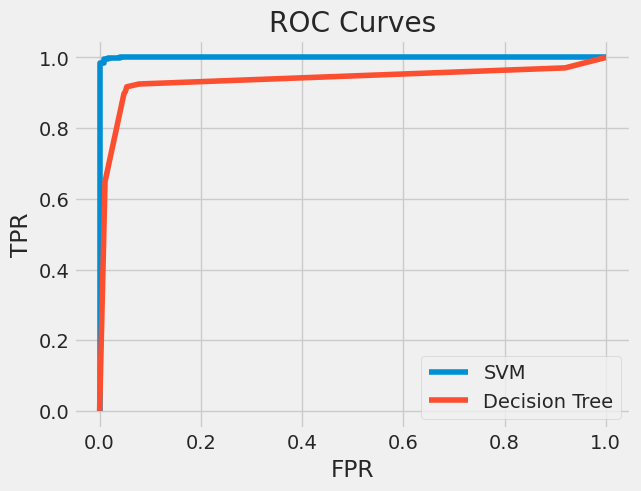

In [35]:
# ROC Curve
from sklearn.preprocessing import label_binarize
y_val_bin = label_binarize(y_val, classes=[0,1])

svm_probs = svm_grid.best_estimator_.decision_function(X_val)
dt_probs = dt_grid.best_estimator_.predict_proba(X_val)[:,1]

fpr_svm, tpr_svm, _ = roc_curve(y_val_bin, svm_probs)
fpr_dt, tpr_dt, _ = roc_curve(y_val_bin, dt_probs)

plt.plot(fpr_svm, tpr_svm, label='SVM')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.title('ROC Curves')
plt.show()

In [37]:
# Load test data
final_test = pd.read_csv("Final_test_data.csv")

# Apply the same cleaning steps as the training data
final_test['clean_text'] = final_test['essay'].apply(remove_numbers_func)
final_test['clean_text'] = final_test['clean_text'].apply(remove_puncs_funcs)
final_test['clean_text'] = final_test['clean_text'].apply(remove_alpha_numeric_func)
final_test['clean_text'] = final_test['clean_text'].apply(lemmatize_text)
final_test['clean_text'] = final_test['clean_text'].apply(remove_stopwords)


# Predict with best model
final_preds = svm_grid.best_estimator_.predict(final_test['clean_text'])

# Save CSV
submission = pd.DataFrame({
    'clean_text': final_test['clean_text'],
    'predicted_label': final_preds
})

submission.to_csv("Emmanuel_Ojo_test_R11839043.csv", index=False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Save the notebook to your Drive (replace the path with your own)
!cp /content/your_notebook_name.ipynb /content/drive/MyDrive/
